# Credit Risk Management: Classification Models & Hyperparameter Tuning

### Business Application

Credit Score Cards are one of the common risk control methods in the financial industry which uses personal information and transactional records to identify and evaluate the creditworthiness of existing and potential customers. 
There are a number of different use cases leveraging this measure such as 
* loan management,
* credit card approval, 
* credit limit extension

### Dataset

* The dataset used in this project is shared publicly via Kaggle, 
https://www.kaggle.com/rikdifos/credit-card-approval-prediction
* Which includes 2 sub-sets: personal information and transactional records. Utilise and merge both files into one dataset to make the analysis more insightful and actionable.

### Working
* Explanatory Data Analysis (EDA) and Feature Engineering
* Feature Scaling and Selection (+ Imbalanced Data Handling)
* Machine Learning Modelling

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

## 1.Explanatory Data Analysis

In [4]:
#personal informations applications
application = pd.read_csv("data/application_record.csv")
application.columns = map(str.lower, application.columns)
application.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   438557 non-null  int64  
 1   code_gender          438557 non-null  object 
 2   flag_own_car         438557 non-null  object 
 3   flag_own_realty      438557 non-null  object 
 4   cnt_children         438557 non-null  int64  
 5   amt_income_total     438557 non-null  float64
 6   name_income_type     438557 non-null  object 
 7   name_education_type  438557 non-null  object 
 8   name_family_status   438557 non-null  object 
 9   name_housing_type    438557 non-null  object 
 10  days_birth           438557 non-null  int64  
 11  days_employed        438557 non-null  int64  
 12  flag_mobil           438557 non-null  int64  
 13  flag_work_phone      438557 non-null  int64  
 14  flag_phone           438557 non-null  int64  
 15  flag_email       

In [6]:
# consists transactional infromation
credit = pd.read_csv("data/credit_record.csv")

#convert strings to lower case
credit.columns = map(str.lower, credit.columns)
credit.head()

,id,months_balance,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1048575 non-null  int64 
 1   months_balance  1048575 non-null  int64 
 2   status          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [8]:
credit.status.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: status, dtype: int64

In [9]:

#Convert status column to numeric
credit.status = credit.status.replace({'X':-2, 'C': -1})
credit.status = credit.status.astype('int')

#loop through the whole column to remove negatives
credit.status = credit.status.apply(lambda x:x+1)

In [10]:

#Find the latest month
credit_month = credit.groupby('id').months_balance.max().reset_index()
credit_month.head()

,id,months_balance
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [11]:
#Merge the df with latest months matched with its status
#inner join is usually the default pick
record = pd.merge(credit_month, credit, how="inner", on=["id", "months_balance"])
record.head()

,id,months_balance,status
0,5001711,0,-1
1,5001712,0,0
2,5001713,0,-1
3,5001714,0,-1
4,5001715,0,-1


In [12]:
#Merge the record df with application df

df = pd.merge(application, record, on="id", how="inner")
df.head()

#there are two columns with negatives

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,-1


In [13]:
#Rename columns
df = df.rename(columns={'code_gender':'gender',
                   'flag_own_car':'car',
                   'flag_own_realty':'property',
                   'cnt_children':'children',
                   'amt_income_total':'annual_income',
                   'name_income_type':'income_type',
                   'name_education_type':'education',
                   'name_family_status':'family_status',
                   'name_housing_type':'housing_type',
                   'days_birth':'birth_date',
                   'days_employed':'employment',
                   'flag_mobil':'mobile_phone',
                   'flag_work_phone':'work_phone',
                   'flag_phone':'phone',
                   'flag_email': 'email',
                   'cnt_fam_members':'fam_members'
                   })
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,birth_date,employment,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,-1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               36457 non-null  int64  
 1   gender           36457 non-null  object 
 2   car              36457 non-null  object 
 3   property         36457 non-null  object 
 4   children         36457 non-null  int64  
 5   annual_income    36457 non-null  float64
 6   income_type      36457 non-null  object 
 7   education        36457 non-null  object 
 8   family_status    36457 non-null  object 
 9   housing_type     36457 non-null  object 
 10  birth_date       36457 non-null  int64  
 11  employment       36457 non-null  int64  
 12  mobile_phone     36457 non-null  int64  
 13  work_phone       36457 non-null  int64  
 14  phone            36457 non-null  int64  
 15  email            36457 non-null  int64  
 16  occupation_type  25134 non-null  object 
 17  fam_members 

In [15]:
df.isna().sum()

id                     0
gender                 0
car                    0
property               0
children               0
annual_income          0
income_type            0
education              0
family_status          0
housing_type           0
birth_date             0
employment             0
mobile_phone           0
work_phone             0
phone                  0
email                  0
occupation_type    11323
fam_members            0
months_balance         0
status                 0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

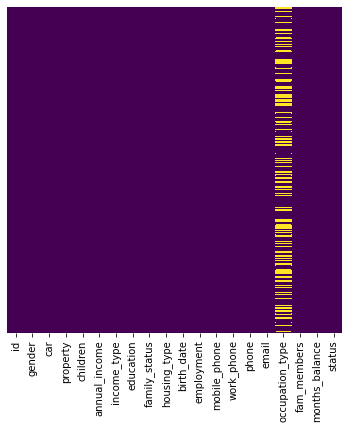

In [16]:
plt.figure(figsize = (6,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show

In [17]:

#Fill null values
df.occupation_type = df.occupation_type.fillna("Others")

<function matplotlib.pyplot.show(close=None, block=None)>

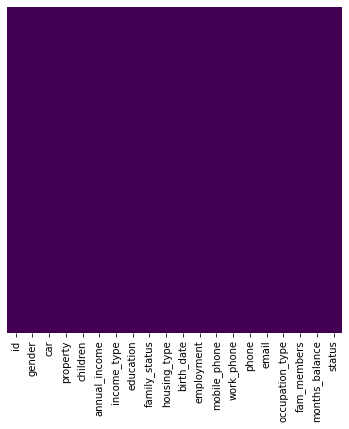

In [18]:
plt.figure(figsize = (6,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show

In [19]:
#Transform birth_date and employment to positive numbers

#days to years
df['age'] = df.birth_date.apply(lambda x: round(x/-365,0))

df['years_of_employment'] = df.employment.apply(lambda x: round(x/-365,0) if x<0 else 0)

#columns we no longer need
df = df.drop(columns=["birth_date","employment"])

In [20]:
df.describe()

,id,children,annual_income,mobile_phone,work_phone,phone,email,fam_members,months_balance,status,age,years_of_employment
count,3.645700e+04,36457.000000,3.645700e+04,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.00000
mean,5.078227e+06,0.430315,1.866857e+05,1.0,0.225526,0.294813,0.089722,2.198453,-5.831802,-0.002716,43.777382,6.03810
std,4.187524e+04,0.742367,1.017892e+05,0.0,0.417934,0.455965,0.285787,0.911686,11.326494,0.783104,11.519211,6.48948
min,5.008804e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,-1.000000,21.000000,0.00000
25%,5.042028e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,-6.000000,-1.000000,34.000000,1.00000
50%,5.074614e+06,0.000000,1.575000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,43.000000,4.00000
75%,5.115396e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,53.000000,9.00000
max,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,6.000000,69.000000,43.00000


<AxesSubplot:xlabel='annual_income'>

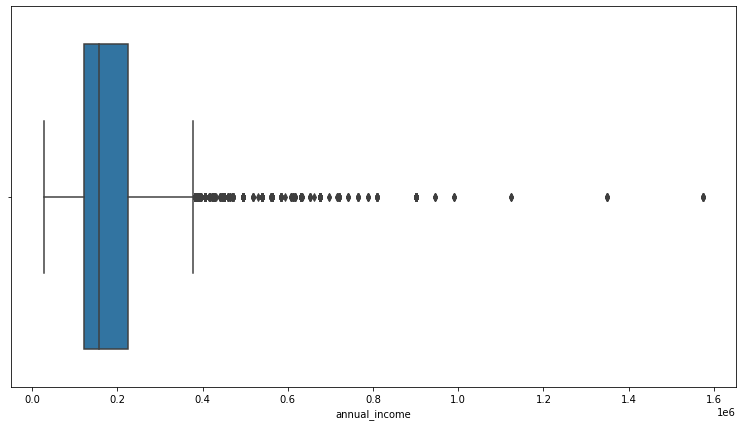

In [21]:
#Detect and remove outliers: Annual_income

plt.figure(figsize=(13,7))
sns.boxplot(df.annual_income)

<AxesSubplot:xlabel='annual_income'>

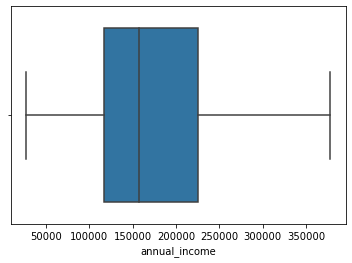

In [22]:
#Option: Z-score or IQR, z-score only for Gaugassian distribution => IQR

#do not remove outliers in categorical features

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.annual_income)

df = df.loc[(df.annual_income > lower) & (df.annual_income < upper)]

sns.boxplot(df.annual_income)

<AxesSubplot:xlabel='fam_members'>

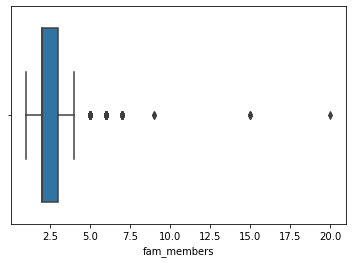

In [23]:

#Detect and remove outliers: Fam_members

sns.boxplot(df.fam_members)

2.0    18729
1.0     6721
3.0     6057
4.0     2976
Name: fam_members, dtype: int64

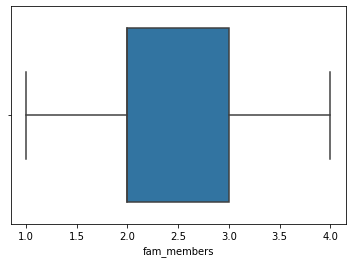

In [24]:

remove_outlier(df.fam_members)

df = df.loc[(df.fam_members>0.5) & (df.fam_members <4.5)]


sns.boxplot(df.fam_members)

df.fam_members.value_counts()

<AxesSubplot:xlabel='children'>

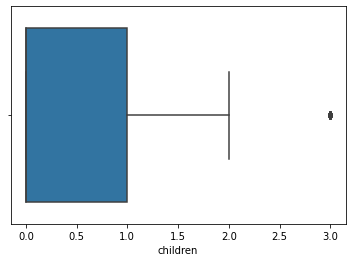

In [25]:
sns.boxplot(df['children'])

<AxesSubplot:xlabel='children'>

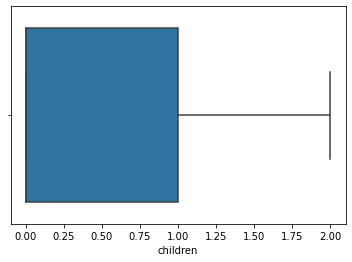

In [26]:
lower, upper = remove_outlier(df.children)

df = df.loc[(df.children > lower) & (df.children < upper)]

sns.boxplot(df.children)

<AxesSubplot:xlabel='age'>

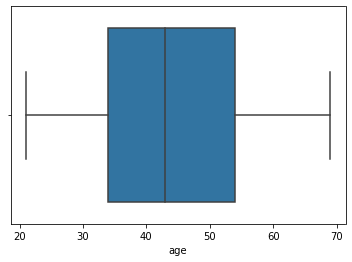

In [27]:
sns.boxplot(df['age'])

In [28]:
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,years_of_employment
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,0,0,59.0,3.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,1,52.0,8.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,-22,-1,52.0,8.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,0,52.0,8.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,0,52.0,8.0


In [29]:
#Define target variable
df.status.value_counts()

 0    17047
-1     9073
 1     7980
 2      262
 6       64
 3       18
 4        6
 5        5
Name: status, dtype: int64

<AxesSubplot:xlabel='status'>

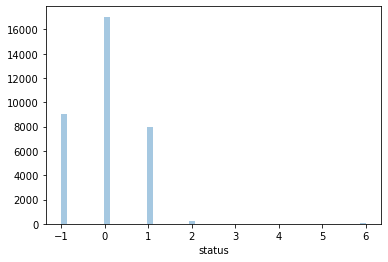

In [30]:
#check distribution(hist)

sns.distplot(df.status, kde=False)

In [31]:
#Target = 1 if status >=1 (with due debt), else Target = 0
#change values that are greater or less than one to 1 and 0 respectively
df['target'] = None
df.loc[df.status < 1,'target']=0
df.loc[df.status >= 1,'target']=1
df.target = pd.to_numeric(df.target)
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,...,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,years_of_employment,target
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,0,59.0,3.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,1,52.0,8.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,-22,-1,52.0,8.0,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,0,52.0,8.0,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,0,52.0,8.0,0


In [32]:
#Drop unnecessary columns
df.drop(columns=['months_balance', 'status', 'mobile_phone'],inplace=True)

In [33]:
#Convert object dtype to category dtype for feature processing
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')

df.dtypes

id                        int64
gender                 category
car                    category
property               category
children                  int64
annual_income           float64
income_type            category
education              category
family_status          category
housing_type           category
work_phone                int64
phone                     int64
email                     int64
occupation_type        category
fam_members             float64
age                     float64
years_of_employment     float64
target                    int64
dtype: object

#### Visulizations

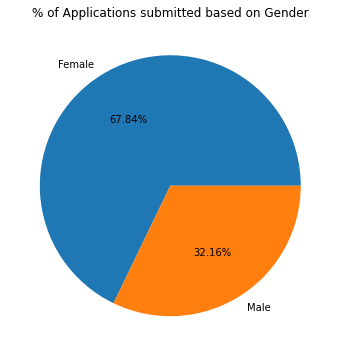

In [34]:
# This graph shows that, majority of application are submitted by Female's
plt.figure(figsize = (6,6))
plt.pie(df['gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on Gender')
plt.show()

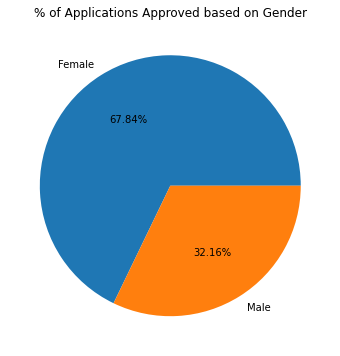

In [35]:
# This graph shows that, majority of application are approved for Female's
plt.figure(figsize = (6,6))
plt.pie(df[df['target']==0]['gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.2f%%')
plt.title('% of Applications Approved based on Gender')
plt.show()

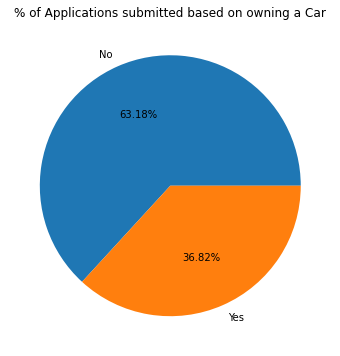

In [36]:
# This graph shows that, majority of applicatant's dont own a car
plt.figure(figsize = (6,6))
plt.pie(df['car'].value_counts(), labels=['No', 'Yes'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Car')
plt.show()

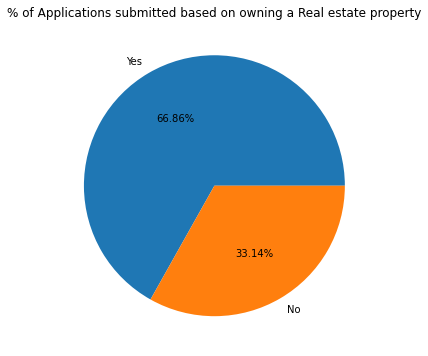

In [37]:
# This graph shows that, majority of applicatant's own a Real Estate property / House
# This graph shows that, majority of applicatant's don't have any children
plt.figure(figsize = (6,6))
plt.pie(df['property'].value_counts(), labels=['Yes','No'], autopct='%1.2f%%')
plt.title('% of Applications submitted based on owning a Real estate property')
plt.show()

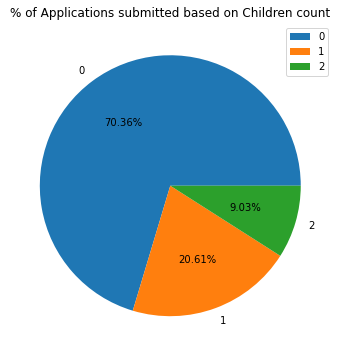

In [38]:
# This graph shows that, majority of applicatant's don't have any children
plt.figure(figsize = (6,6))
plt.pie(df['children'].value_counts(), labels=df['children'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Children count')
plt.legend()
plt.show()

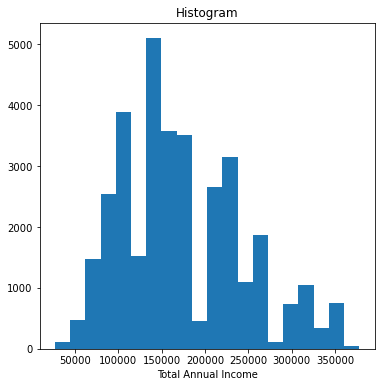

In [39]:
# This graph shows that, majority of applicatant's income lies between 1 to 3 lakh
plt.figure(figsize = (6,6))
plt.hist(df['annual_income'], bins=20)
plt.xlabel('Total Annual Income')
plt.title('Histogram')
plt.show()

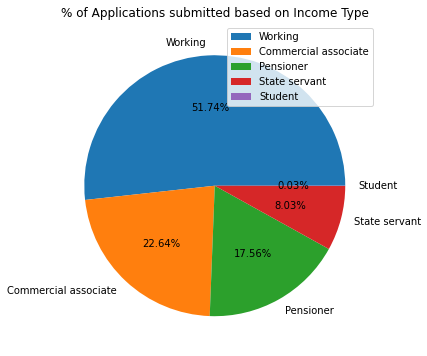

In [40]:
# This graph shows that, majority of applicatant's are working professional
plt.figure(figsize = (6,6))
plt.pie(df['income_type'].value_counts(), labels=df['income_type'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Income Type')
plt.legend()
plt.show()

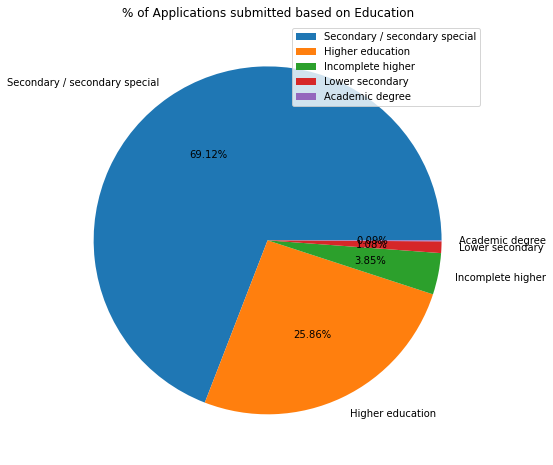

In [41]:
# This graph shows that, majority of applicatant's completed the Secondary Education
plt.figure(figsize=(8,8))
plt.pie(df['education'].value_counts(), labels=df['education'].value_counts().index, autopct='%1.2f%%')
plt.title('% of Applications submitted based on Education')
plt.legend()
plt.show()

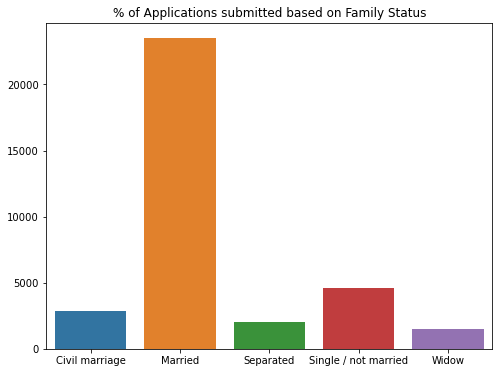

In [42]:
# This graph shows that, majority of applicatant's are married
plt.figure(figsize=(8,6))
sns.barplot(df['family_status'].value_counts().index, df['family_status'].value_counts().values)
plt.title('% of Applications submitted based on Family Status')
plt.show()

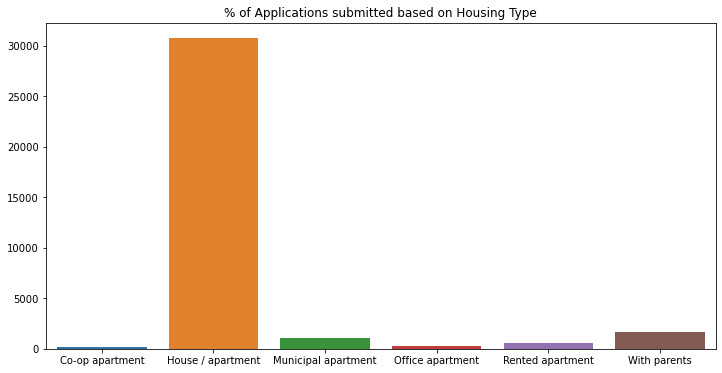

In [43]:
# This graph shows that, majority of applicatant's lives in House / Apartment
plt.figure(figsize=(12,6))
sns.barplot(df['housing_type'].value_counts().index, df['housing_type'].value_counts().values)
plt.title('% of Applications submitted based on Housing Type')
plt.show()

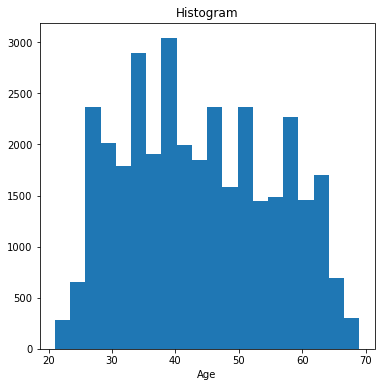

In [44]:
# This graph shows that, majority of applicatant's are 25 to 65 years old
plt.figure(figsize=(6,6))
plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.title('Histogram')
plt.show()

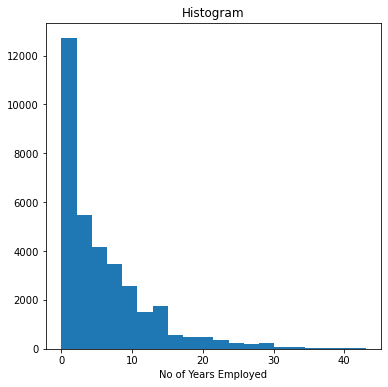

In [45]:
# This graph shows that, majority of applicatant's are Employed for 0 to 7 years
plt.figure(figsize=(6,6))
plt.hist(df['years_of_employment'], bins=20)
plt.xlabel('No of Years Employed')
plt.title('Histogram')
plt.show()

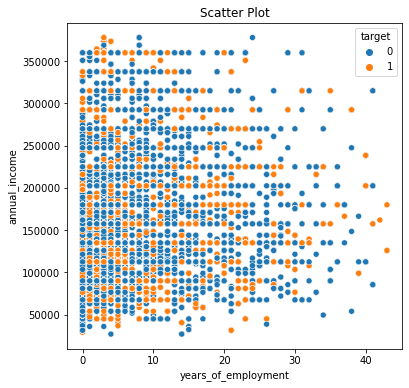

In [47]:
# This graph shows that, majority of applications are rejected if Total income & years of Employment is less
plt.figure(figsize=(6,6))
sns.scatterplot(df['years_of_employment'], df['annual_income'], hue=df['target'])
plt.title('Scatter Plot')
plt.show()

## 2. Feature engineering

In [48]:
#Category encoding
#Encoding without using the target variable (no independent variables are impacted prior to modeling)
#Binary variable: LabelEncoder, Binarizer
#Nominal variable: using mean or mode // Dummy Coding or OneHotEncoder (<5 values/variable)
#Continous variable: binning with Fixed-width and Adaptive Binning, then apply mean/mode

#### Data leakage  
Data leakage is when information from outside the training dataset is used to create the model. This additional information can allow the model to learn or know something that it otherwise would not know and in turn invalidate the estimated performance of the mode being constructed.

In [49]:
df_a = df #for encoding without target

In [50]:
#Pre-requisite: train test split to avoid data leakage

x_a = df_a.iloc[:, 1:-1]
y_a = df_a.iloc[:, -1]

from sklearn.model_selection import train_test_split

x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, test_size=0.3, random_state=1)

In [51]:
#Encoding WITHOUT target (using df_a)

In [52]:
#Binary variables: gender, car, property

#Option 1: Label Encoder (applied to >2 categories per variable)
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

le = LabelEncoder()
gender_le = le.fit_transform(x_a_train.gender)

#Option 2: LabelBinarizer (applied to 2 categories per variable only)
bn = LabelBinarizer()

gender_bn = np.array(x_a_train.gender).reshape(-1,1)
gender_bn = bn.fit_transform(gender_bn)

#Apply to x_train and x_test

x_a_train.loc[:, 'gender'] = le.fit_transform(x_a_train.loc[:, 'gender'])
x_a_train.loc[:, 'car'] = le.fit_transform(x_a_train.loc[:, 'car'])
x_a_train.loc[:, 'property'] = le.fit_transform(x_a_train.loc[:, 'property'])

x_a_test.loc[:, 'gender'] = le.fit_transform(x_a_test.loc[:, 'gender'])
x_a_test.loc[:, 'car'] = le.fit_transform(x_a_test.loc[:, 'car'])
x_a_test.loc[:, 'property'] = le.fit_transform(x_a_test.loc[:, 'property'])

In [53]:
# Nominal variables: income_type, education, family_status, housing_type, occupation_type

#Option 1: Dummy Coding: kn - k variables

income_type_dummy = pd.get_dummies(x_a_train.income_type)
print(income_type_dummy)

#Option 2: OneHotEcnoder: kn variables

from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')
income_type_onehot = onehot.fit_transform(x_a_train.income_type.to_numpy().reshape(-1,1))
income_type_onehot = pd.DataFrame(income_type_onehot, columns=onehot.get_feature_names(['income_type']))
income_type_onehot.head()

#As OneHotEncoder of sklearn was designed to keep the consistency in the number of categories across train and
#test set, so we can control any category which doesn't appear in train set with "handle_unknown="error""

#Apply for x_train set

nominal = onehot.fit_transform(x_a_train[['income_type', 'education', 'family_status', 'housing_type', 
                                             'occupation_type']])
df_nominal = pd.DataFrame(index=x_a_train.index, data=nominal, columns=onehot.get_feature_names(['income_type', 'education', 'family_status',
                                                                        'housing_type', 'occupation_type']))
x_a_train = pd.concat([x_a_train, df_nominal], axis=1)
x_a_train.drop(columns=['income_type', 'education', 'family_status', 'housing_type', 'occupation_type'], inplace=True)
x_a_train.shape

       Commercial associate  Pensioner  State servant  Student  Working
8902                      0          1              0        0        0
23738                     0          0              0        0        1
19617                     1          0              0        0        0
24689                     0          0              0        0        1
33706                     1          0              0        0        0
...                     ...        ...            ...      ...      ...
8260                      0          1              0        0        0
34383                     0          1              0        0        0
5490                      0          1              0        0        0
12814                     0          0              0        0        1
34893                     0          0              0        0        1

[24118 rows x 5 columns]


(24118, 46)

In [54]:

nominal_test = onehot.fit_transform(x_a_test[['income_type', 'education', 'family_status', 'housing_type', 
                                             'occupation_type']])
df_nominal_test = pd.DataFrame(index=x_a_test.index, data=nominal_test, columns=onehot.get_feature_names(['income_type', 'education', 'family_status',
                                                                        'housing_type', 'occupation_type']))
x_a_test = pd.concat([x_a_test, df_nominal_test], axis=1)
x_a_test.drop(columns=['income_type', 'education', 'family_status', 'housing_type', 'occupation_type'], inplace=True)
x_a_test.head()

,gender,car,property,children,annual_income,work_phone,phone,email,fam_members,age,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
32841,0,0,0,0,99000.0,0,0,0,1.0,60.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5216,1,1,1,1,315000.0,0,0,0,3.0,29.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12915,0,0,1,0,112500.0,0,0,0,2.0,66.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
32065,0,0,1,0,90000.0,0,1,0,1.0,41.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10213,0,0,1,0,202500.0,0,0,0,1.0,58.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([12697.,  5338.,  2839.,  1657.,   662.,   405.,   310.,   122.,
           42.,    46.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <BarContainer object of 10 artists>)

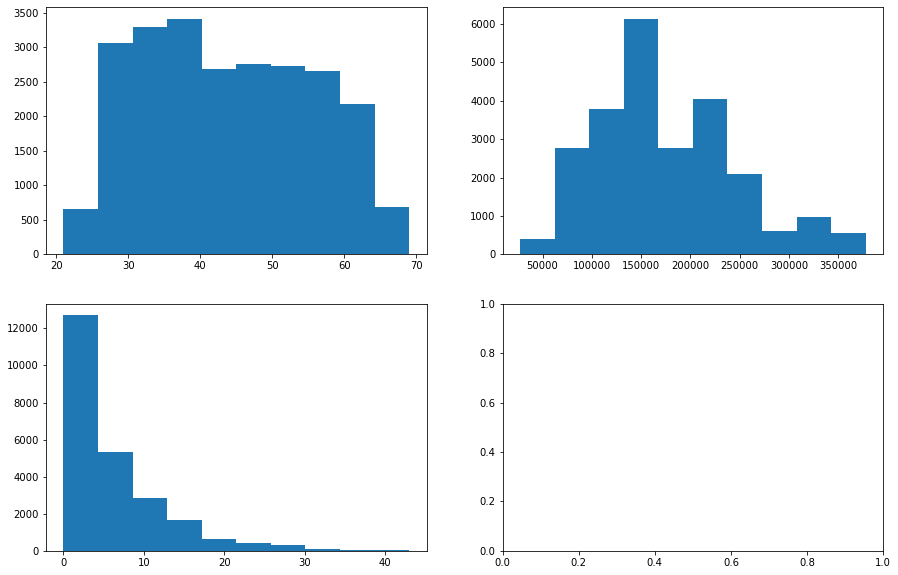

In [55]:

#Continuous variables: annual_income, age, year_of_employment

fig, ax = plt.subplots(2,2,figsize=(15,10))

ax[0][0].hist(x_a_train.age)
ax[0][1].hist(x_a_train.annual_income)
ax[1][0].hist(x_a_train.years_of_employment)

In [56]:
#Option: Fixed-width binning (rounding) or Adaptive binning (quantiles)
#Here, we apply adaptive binning since fixed-width binning requires pre-defining the bins (which is subjective)

#Apply to x_train set

x_a_train['age_binned'] = pd.qcut(x_a_train.age, q=[0, .25, .50, .75, 1])
x_a_train['annual_income_binned'] = pd.qcut(x_a_train.annual_income, q=[0, .25, .50, .75, 1])
x_a_train['years_of_employment_binned'] = pd.qcut(x_a_train.years_of_employment, q=[0, .25, .50, .75, 1])

x_a_train.drop(columns=['age', 'annual_income', 'years_of_employment'], inplace=True)

#Since each category is divided into 5 equal bins, we can apply Label Encoder without bias

x_a_train['age'] = le.fit_transform(x_a_train['age_binned'])
x_a_train['annual_income'] = le.fit_transform(x_a_train['annual_income_binned'])
x_a_train['years_of_employment'] = le.fit_transform(x_a_train['years_of_employment_binned'])

x_a_train.drop(columns=['age_binned','annual_income_binned', 'years_of_employment_binned'],inplace=True)

x_a_train.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,years_of_employment
8902,0,0,1,0,0,0,0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0
23738,0,0,0,0,1,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,2,2
19617,1,0,1,2,1,1,0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,3
24689,0,1,0,0,0,0,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2
33706,0,0,0,0,0,0,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [57]:
#Apply to x_test set

x_a_test['age_binned'] = pd.qcut(x_a_test.age, q=[0, .25, .50, .75, 1])
x_a_test['annual_income_binned'] = pd.qcut(x_a_test.annual_income, q=[0, .25, .50, .75, 1])
x_a_test['years_of_employment_binned'] = pd.qcut(x_a_test.years_of_employment, q=[0, .25, .50, .75, 1])

x_a_test.drop(columns=['age', 'annual_income', 'years_of_employment'], inplace=True)

#Since each category is divided into 5 equal bins, we can apply Label Encoder without bias

x_a_test['age'] = le.fit_transform(x_a_test['age_binned'])
x_a_test['annual_income'] = le.fit_transform(x_a_test['annual_income_binned'])
x_a_test['years_of_employment'] = le.fit_transform(x_a_test['years_of_employment_binned'])

x_a_test.drop(columns=['age_binned','annual_income_binned', 'years_of_employment_binned'],inplace=True)

x_a_test.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,years_of_employment
32841,0,0,0,0,0,0,0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0
5216,1,1,1,1,0,0,0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,2
12915,0,0,1,0,0,0,0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0
32065,0,0,1,0,0,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,2
10213,0,0,1,0,0,0,0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,0


## 3. Feature Scaling (Data Standardization/Normalization)

In [58]:
#df_a (encoded without target)

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

x_a_train_ss = pd.DataFrame(StandardScaler().fit_transform(x_a_train), columns=x_a_train.columns)
x_a_train_ss.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,years_of_employment
0,-0.687514,-0.762567,0.707877,-0.597879,-0.545439,-0.643465,-0.310198,-0.181293,2.181160,-0.29791,...,1.475954,-0.099832,-0.048242,-0.323900,-0.067997,-0.129203,-0.06982,1.396302,-0.377306,-1.255599
1,-0.687514,-0.762567,-1.412676,-0.597879,1.833385,-0.643465,-0.310198,-1.386814,-0.458472,-0.29791,...,-0.677528,-0.099832,-0.048242,3.087374,-0.067997,-0.129203,-0.06982,-1.308816,0.575161,0.546021
2,1.454516,-0.762567,0.707877,2.501455,1.833385,1.554085,-0.310198,2.229749,-0.458472,-0.29791,...,-0.677528,-0.099832,-0.048242,-0.323900,-0.067997,-0.129203,-0.06982,-0.407110,-0.377306,1.446832
3,-0.687514,1.311360,-1.412676,-0.597879,-0.545439,-0.643465,-0.310198,-0.181293,-0.458472,-0.29791,...,-0.677528,-0.099832,-0.048242,-0.323900,-0.067997,-0.129203,-0.06982,-1.308816,-1.329772,0.546021
4,-0.687514,-0.762567,-1.412676,-0.597879,-0.545439,-0.643465,-0.310198,-1.386814,-0.458472,-0.29791,...,-0.677528,-0.099832,-0.048242,-0.323900,-0.067997,-0.129203,-0.06982,-1.308816,-1.329772,-1.255599


In [59]:
x_a_train_rs = pd.DataFrame(RobustScaler().fit_transform(x_a_train), columns=x_a_train.columns)
x_a_train_rs.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,years_of_employment
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.5
1,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.5,0.5,0.5
2,1.0,0.0,0.0,2.0,1.0,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,-0.5,0.5
4,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,-0.5,-0.5


In [60]:

x_a_train_mm = pd.DataFrame(MinMaxScaler().fit_transform(x_a_train), columns=x_a_train.columns)
x_a_train_mm.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,years_of_employment
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.333333,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.333333,0.000000
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.666667,0.666667
2,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,1.000000
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.666667
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [61]:
#Standard Scaler shrinks data to mean=0 and std =1 with the presence of outlier affecting the balanced scale
#MinMaxScaler compress data to a range of [0 to 1] which is limited to modeling
#Robust Scaler shrinks data to medians and quantiles, thus not influenced by outliers

#Apply to x_test set

x_a_test_rs = pd.DataFrame(RobustScaler().fit_transform(x_a_test), columns=x_a_test.columns)

In [62]:
#Dealing with imbalanced data (Random Undersampling / Oversampling (SMOTE))

#the same for both df_a 

a_target_0 = df_a[df_a.target == 0].target.count() / df_a.target.count()
a_target_1 = df_a[df_a.target == 1].target.count() / df_a.target.count()

print(a_target_0)
print(a_target_1)

0.7580902626614424
0.24190973733855753


In [63]:
#Oversampling (SMOTE: Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()

x_a_train_rs_over, y_a_train_over = oversample.fit_resample(x_a_train_rs, y_a_train)
print(Counter(y_a_train_over))

Counter({0: 18337, 1: 18337})


In [64]:
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
oversample= SMOTE(random_state=42)
x_a_train_rs_over, y_a_train_over = oversample.fit_resample(x_a_train_rs, y_a_train)
print(Counter(y_a_train_over))

Counter({0: 18337, 1: 18337})


In [65]:
#Random Undersampling

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()

x_a_train_rs_under, y_a_train_under = undersample.fit_resample(x_a_train_rs, y_a_train)
print(Counter(y_a_train_under))

Counter({0: 5781, 1: 5781})


In [66]:
#Random Undersampling randomly select data from the majority class to delete from the dataset
#which might result in information loss during modeling

#SMOTE (Oversampling) duplicates data from the minority class which helps balance the distribution but does not
#provide any additional information to the model

#Apply to x_test_set
x_a_test_rs_over, y_a_test_over = oversample.fit_resample(x_a_test_rs, y_a_test)
print(Counter(y_a_test_over))




Counter({0: 7783, 1: 7783})


## 4. Feature Selection // Dimensionality Reduction

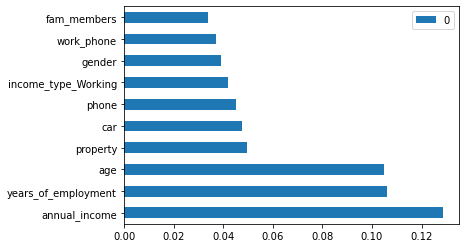

In [67]:

#Feature Importance

#Test on df_a set first
from sklearn.ensemble import ExtraTreesClassifier

fi = ExtraTreesClassifier()
fi_a = fi.fit(x_a_train_rs_over, y_a_train_over)

df_fi_a = pd.DataFrame(fi_a.feature_importances_,index=x_a_train_rs_over.columns)
df_fi_a.nlargest(10,df_fi_a.columns).plot(kind='barh')
plt.show()

occupation_type_Security staff             0.013080
family_status_Married                      0.013585
income_type_Working                        0.018371
occupation_type_Cooking staff              0.018993
age                                        0.020249
occupation_type_Cleaning staff             0.021840
housing_type_House / apartment             0.026919
property                                   0.033582
education_Secondary / secondary special    0.036466
target                                     1.000000
Name: target, dtype: float64


<AxesSubplot:>

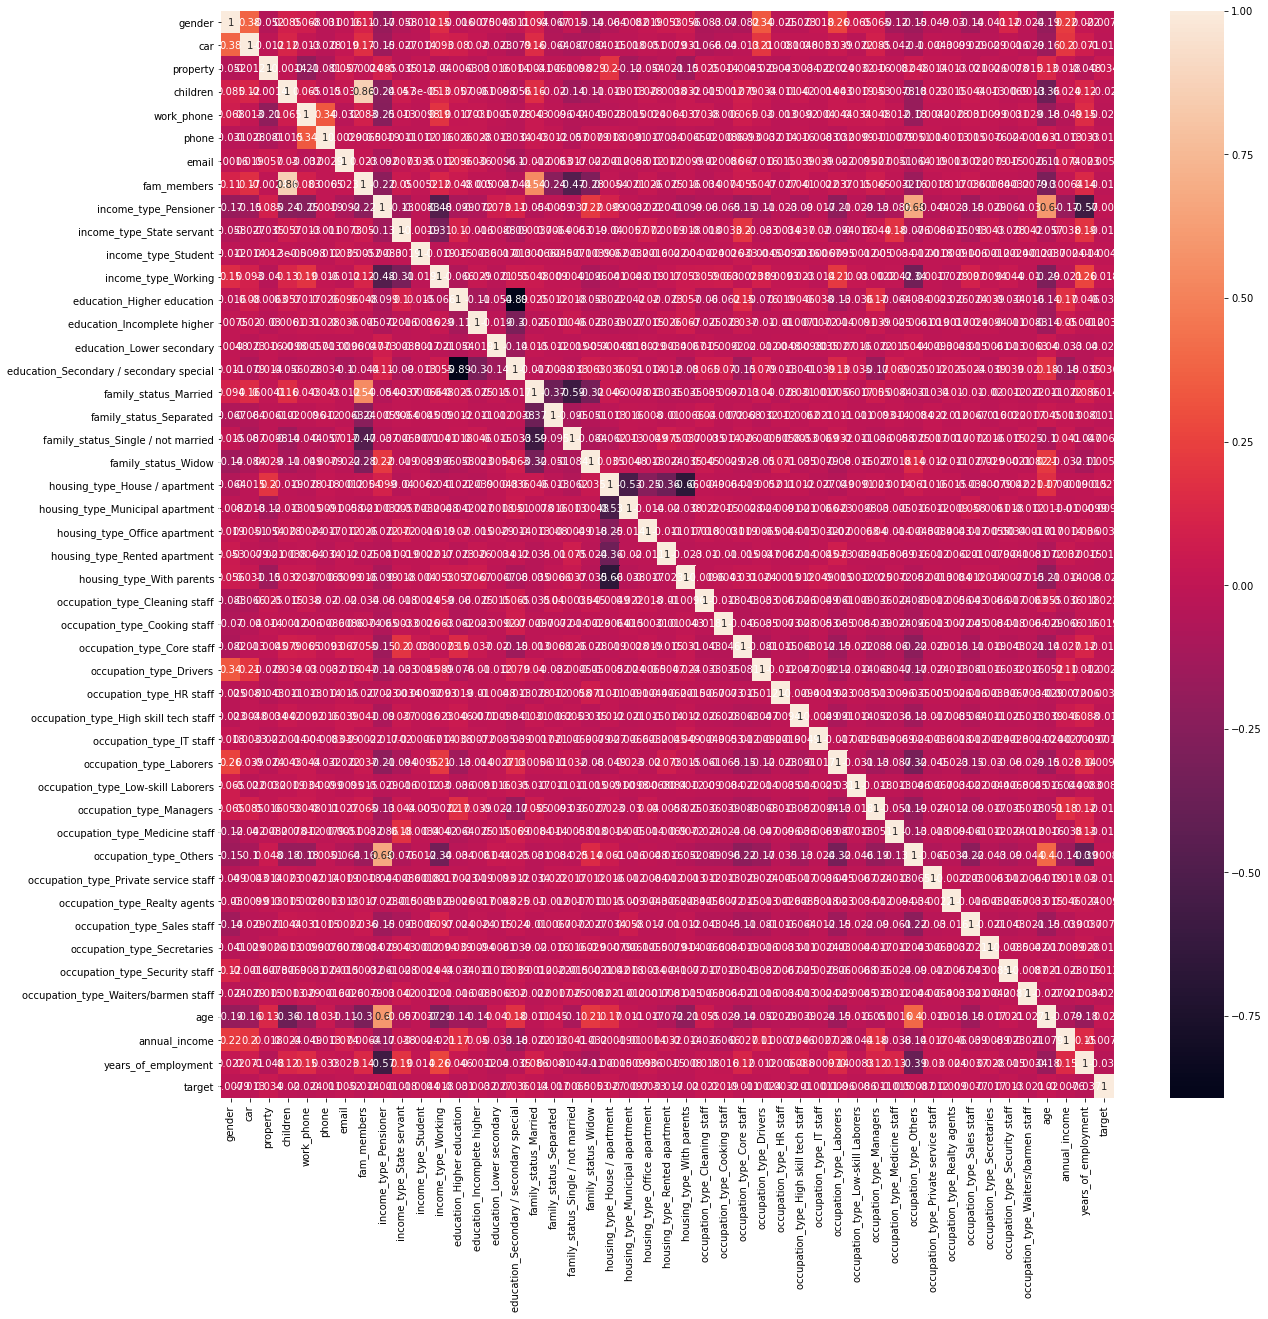

In [68]:
#Correlation Matrix

#Test on df_a set

df_a_train_processed = pd.concat([x_a_train_rs_over, y_a_train_over], axis=1) #combine processed features with their target

cm_a = df_a_train_processed.corr()

print(cm_a.target.sort_values().tail(10))

plt.figure(figsize=(20,20))
sns.heatmap(cm_a, xticklabels=df_a_train_processed.columns, yticklabels=df_a_train_processed.columns,annot=True)

24


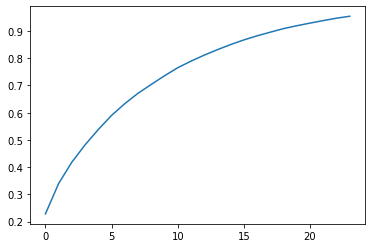

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.961610,1.527091,-0.071187,0.191346,-0.102653,-0.137478,-0.170664,0.079986,-0.238409,-0.078095,...,0.126793,0.001874,-0.113302,-0.016010,-0.007529,-0.038033,0.014668,-0.053139,-0.097986,-0.014882
1,-0.853111,-1.564391,-0.522949,-0.776748,0.734633,0.283815,0.538945,0.471676,-0.290495,-0.298603,...,0.787159,-0.670635,-0.533469,0.015633,-0.312327,-0.111162,-0.068253,-0.083819,-0.001898,0.023138
2,2.470118,0.352674,-0.646406,-0.185037,-0.161684,0.126195,0.926416,-0.308456,0.088877,0.406880,...,0.830105,-0.455977,-0.158366,0.050175,-0.216286,-0.229260,0.030691,-0.232787,-0.063579,-0.056565
3,0.257881,-0.895910,0.346100,-0.317047,-0.073856,0.579982,-1.105646,0.711738,0.402744,-0.107071,...,-0.238647,0.097878,0.015999,-0.109013,0.080249,0.092840,0.013343,-0.168689,0.072768,-0.114247
4,-1.119568,-0.852051,0.680696,-1.051968,1.378076,0.522033,-0.322632,0.858473,-0.101221,0.075741,...,0.469904,-0.131307,-0.418736,-0.004024,0.235156,0.154989,0.122011,-0.262949,-0.038837,-0.021241


In [69]:
#Dimensionality Reduction in a way that avoids data loss (Component-based): PCA -no of independent componets., avoids learning too much of data
#PCA groups variables by their correlations, and each group is condisidered as a factor
#PCA creates a new set of variables with a smaller set of factors that are uncorrelated
#in such a way that 1st PC explains maximum variance, followed by 2nd and so on (n_components)

#PCA on df_a set

df_a_train_processed.shape

from sklearn.decomposition import PCA

pca = PCA(.95)

pca_a_train = pca.fit(x_a_train_rs_over, y_a_train_over)
print(pca_a_train.n_components_)

plt.plot(np.cumsum(pca_a_train.explained_variance_ratio_))
plt.show()

x_a_train_rs_over_pca = pd.DataFrame(pca_a_train.transform(x_a_train_rs_over))
x_a_train_rs_over_pca.head()

In [70]:

#Dimensionality Reduction (Projection-based): t-SNE or UMAP
#t-SNE works well for large dataset but its proven limitations are low computing time and large-scale information loss
#UMAP is proven to have shorter runtime while preserving information 

#UMAP first calculates the distance between the points in high dimensional space, projects them onto the low 
#dimensional space, and calculates the distance between points in this low dimensional space. 
#It then uses Stochastic Gradient Descent to minimize the difference between these distances.

#import umap

#um = umap.UMAP(n_components=24)

#umap_a_train = um.fit_transform(x_a_train_rs_over)

In [71]:
#x_a_train_rs_over_umap = pd.DataFrame(umap_a_train)
#x_a_train_rs_over_umap.head()

#UMAP has a higher computing time than PCA, so for the sake of this project, we use PCA prior to modeling

In [72]:
#Apply PCA on x_test set

pca_a_test = pca.fit(x_a_test_rs_over, y_a_test_over)
print(pca_a_test.n_components_)

x_a_test_rs_over_pca = pd.DataFrame(pca_a_test.transform(x_a_test_rs_over))
x_a_test_rs_over_pca.head()

24


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-2.005928,0.908866,-0.257147,-0.459333,0.676345,0.038450,0.397690,-0.313516,0.678734,-0.045352,...,-0.237369,-0.002026,-0.568103,0.004334,0.107481,-0.088418,-0.017989,-0.082498,-0.127163,-0.007904
1,1.558530,-0.690918,1.171180,0.422582,0.081593,-0.260391,-0.393151,0.100295,0.045473,-0.155387,...,0.058007,0.660540,0.079011,-0.427365,-0.239533,-0.455044,-0.072227,-0.158199,0.120207,0.092457
2,-1.014782,1.626151,-0.208845,0.003944,-0.162714,-0.033835,-0.382328,-0.164814,-0.008527,0.132663,...,0.098474,-0.053925,-0.085648,0.012571,0.004924,-0.042070,0.022693,-0.090361,-0.083231,-0.004862
3,-1.065552,-0.735165,-0.889380,-0.823879,-0.009442,-0.016511,-0.264347,0.620673,-0.092277,0.058113,...,-0.508299,-0.287312,0.811630,-0.192630,-0.266502,-0.155061,-0.042450,-0.020949,-0.537650,-0.080978
4,-1.921199,0.936322,0.125456,0.078867,0.264188,-0.600627,0.396223,0.226712,0.000759,-0.346955,...,0.186375,-0.035105,0.466681,0.008775,-0.040790,-0.010010,0.083473,0.057684,0.714848,0.066742


In [73]:

#6. Apply algorithm 
# Models to be tested: L ogistic Regression, KNearest, SVM, Decision Tree, Random Forest/regressor, XGBoost, LightGBM

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [74]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}

In [75]:
#Compute the training score of each models

train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_a_train_rs_over_pca, y_a_train_over)
    train_score = round(classifier.score(x_a_train_rs_over_pca, y_a_train_over),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(x_a_test_rs_over_pca, y_a_test_over),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.54, 0.78, 0.7, 0.85, 0.85]
[0.52, 0.55, 0.58, 0.51, 0.56]


In [76]:
# %% time
from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_a_train_rs_over_pca, y_a_train_over)
    train_score = cross_val_score(classifier, x_a_train_rs_over_pca, y_a_train_over, cv=5)
    train_cross_scores.append(round(train_score.mean(),2))
    test_score = cross_val_score(classifier, x_a_test_rs_over_pca, y_a_test_over, cv=5)
    test_cross_scores.append(round(test_score.mean(),2))
    
print(train_cross_scores)
print(test_cross_scores)

[0.53, 0.69, 0.66, 0.72, 0.75]
[0.53, 0.7, 0.68, 0.71, 0.77]


In [77]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier()
rf.fit(x_a_train_rs_over_pca, y_a_train_over)
rf_pred = cross_val_predict(rf, x_a_test_rs_over_pca, y_a_test_over, cv=5)
print(roc_auc_score(y_a_test_over, rf_pred))

0.7638442759861235


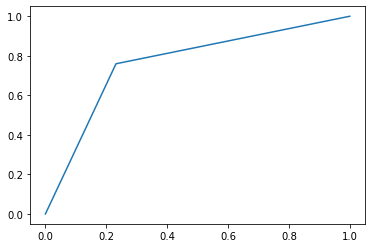

In [78]:
fpr, tpr, _ = roc_curve(y_a_test_over, rf_pred)
plt.plot(fpr, tpr)
plt.show()

In [93]:
#Modelling score has improved after removing resampling bit (on both df_a and df_b set)
#However, we have not achieved the best accuracy score as we expect (>90%)

In [94]:
#Try UMAP on the dataset instead to see if the score improves
#However, no improvement was seen yet it cost our memory for  longer runtime

In [95]:

#We also traced back to different scalers (SS, MM), to see if changing the scaler might improve the score or not
#But no improvement was seen, meaning scalers did not impact the modelling score

In [81]:
#6.2. Hyperparameter Tuning


# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report,confusion_matrix


# #Logistic Regression
# lr = LogisticRegression()
# lr_params = {"penalty": ['l2'], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
#                   "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
# grid_logistic = GridSearchCV(lr, lr_params)
# grid_logistic.fit(x_a_train_rs_over_pca, y_a_train_over)
# lr_best = grid_logistic.best_estimator_




In [82]:
# lr.fit(x_a_train_rs_over_pca, y_a_train_over)
# predictions = lr.predict(x_a_test_rs_over_pca)
# print(classification_report(y_a_test_over,predictions))
# print(confusion_matrix(y_a_test_over,predictions))



In [83]:
# #KNearest Neighbors
# knear = KNeighborsClassifier()
# knear_params = {"n_neighbors": list(range(2,7,1)), "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brutle']}
# grid_knear = GridSearchCV(knear, knear_params)
# grid_knear.fit(x_a_train_rs_over_pca, y_a_train_over)
# knear_best = grid_knear.best_estimator_




In [84]:
# knear.fit(x_a_train_rs_over_pca, y_a_train_over)
# predictions = knear.predict(x_a_test_rs_over_pca)
# print(classification_report(y_a_test_over,predictions))
# print(confusion_matrix(y_a_test_over,predictions))


In [85]:
# #SVC

# svc = SVC()
# svc_params = {"C": [0.5, 0.7, 0.9, 1], "kernel":['rbf', 'poly', 'sigmoid', 'linear']}
# grid_svc = GridSearchCV(svc, svc_params)
# grid_svc.fit(x_a_train_rs_over_pca, y_a_train_over)
# svc_best = grid_svc.best_estimator_



In [86]:
# svc.fit(x_a_train_rs_over_pca, y_a_train_over)
# predictions = svc.predict(x_a_test_rs_over_pca)
# print(classification_report(y_a_test_over,predictions))
# print(confusion_matrix(y_a_test_over,predictions))


In [87]:
# #Decision Tree

# tree = DecisionTreeClassifier()
# tree_params = {"criterion": ['gini', 'entropy'], "max_depth":list(range(2,5,1)), "min_samples_leaf":list(range(5,7,1))}
# grid_tree = GridSearchCV(tree, tree_params)
# grid_tree.fit(x_a_train_rs_over_pca, y_a_train_over)
# tree_best = grid_tree.best_estimator_



In [88]:
# tree.fit(x_a_train_rs_over_pca, y_a_train_over)
# predictions = tree.predict(x_a_test_rs_over_pca)
# print(classification_report(y_a_test_over,predictions))
# print(confusion_matrix(y_a_test_over,predictions))


In [89]:
# import xgboost as xgb

# xgb_model = xgb.XGBClassifier()
# xgb_model.fit(x_a_train_rs_over_pca, y_a_train_over)
# xgb_train_score = cross_val_score(xgb_model, x_a_train_rs_over_pca, y_a_train_over, cv=5)
# xgb_test_score = cross_val_score(xgb_model, x_a_test_rs_over_pca, y_a_test_over, cv=5)

# print(round(xgb_train_score.mean(),2))
# print(round(xgb_test_score.mean(),2))



In [90]:
# import xgboost as xgb
# from sklearn.metrics import classification_report,confusion_matrix
# xgb_model = xgb.XGBClassifier()
# xgb_model.fit(x_a_train_rs_over_pca, y_a_train_over)
# predictions = xgb_model.predict(x_a_test_rs_over_pca)
# print(classification_report(y_a_test_over,predictions))
# print(confusion_matrix(y_a_test_over,predictions))


In [91]:

# import lightgbm as lgb

# lgb_model = lgb.LGBMClassifier()
# lgb_model.fit(x_a_train_rs_over_pca, y_a_train_over)
# lgb_train_score = cross_val_score(lgb_model, x_a_train_rs_over_pca, y_a_train_over, cv=5)
# lgb_test_score = cross_val_score(lgb_model, x_a_test_rs_over_pca, y_a_test_over, cv=5)

# print(round(lgb_train_score.mean(),2))
# print(round(lgb_test_score.mean(),2))




In [92]:
# lgb_model.fit(x_a_train_rs_over_pca, y_a_train_over)
# predictions = lgb_model.predict(x_a_test_rs_over_pca)
# print(classification_report(y_a_test_over,predictions))
# print(confusion_matrix(y_a_test_over,predictions))